In [ ]:
!pip install flask-ngrok
!pip install pyngrok
!ngrok authtoken '金鑰'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 7.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=9bbbaf4925618872b7530ca6b998246ed48c02c5fda839e509da710687954e5a
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# Required imports
import os
import firebase_admin
from flask import Flask, request, jsonify
from firebase_admin import credentials, firestore, initialize_app
from flask_ngrok import run_with_ngrok

In [ ]:
# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Initialize Firestore DB
cred = credentials.Certificate('key.json')
default_app = initialize_app(cred)
db = firestore.client()
todo_ref = db.collection('Members')

In [ ]:
@app.route('/add', methods=['POST'])
def create():
    """
        create() : Add document to Firestore collection with request body.
        Ensure you pass a custom ID as part of json body in post request,
        e.g. json={'id': '1', 'title': 'Write a blog post'}
    """
    try:
        id = request.json['id']
        todo_ref.document(id).set(request.json)
        return jsonify({"success": True}), 200
    except Exception as e:
        return f"An Error Occurred: {e}"

In [ ]:
@app.route('/list', methods=['GET'])
def read():
    """
        read() : Fetches documents from Firestore collection as JSON.
        todo : Return document that matches query ID.
        all_todos : Return all documents.
    """
    try:
        # Check if ID was passed to URL query
        todo_id = request.args.get('id')
        if todo_id:
            todo = todo_ref.document(todo_id).get()
            return jsonify(todo.to_dict()), 200
            '''
            #處理 An Error Occurred: Object of type GeoPoint is not JSON serializable 
            result = todo_ref.document(todo_id).get().to_dict()
            record = {}
            # Populate the new dict with JSON serializiable values
            for key in result:
              if isinstance(result[key], firebase_admin.firestore.GeoPoint):
                record[key] =str(result[key].latitude)+','+str(result[key].longitude)
                continue
              record[key] = result[key]

            # Add the key so that we have a reference to the record
            record['key'] = result[key]
            return jsonify(record)
            '''
        else:
            all_todos = [doc.to_dict() for doc in todo_ref.stream()]
            return jsonify(all_todos), 200
    except Exception as e:
        return f"An Error Occurred: {e}"

In [ ]:
@app.route('/update', methods=['POST', 'PUT'])
def update():
    """
        update() : Update document in Firestore collection with request body.
        Ensure you pass a custom ID as part of json body in post request,
        e.g. json={'id': '1', 'title': 'Write a blog post today'}
    """
    try:
        id = request.json['id']
        todo_ref.document(id).update(request.json)
        return jsonify({"success": True}), 200
    except Exception as e:
        return f"An Error Occurred: {e}"

In [ ]:
@app.route('/delete', methods=['GET', 'DELETE'])
def delete():
    """
        delete() : Delete a document from Firestore collection.
    """
    try:
        # Check for ID in URL query
        todo_id = request.args.get('id')
        todo_ref.document(todo_id).delete()
        return jsonify({"success": True}), 200
    except Exception as e:
        return f"An Error Occurred: {e}"

In [ ]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3c99-104-197-66-12.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Jun/2022 03:02:48] "GET /list?id=1 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:02:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Jun/2022 03:02:49] "GET /list?id=1 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:02:59] "GET /list?id=1 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:02:59] "GET /list?id=1 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:03:02] "GET /list?id=1 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:03:02] "GET /list?id=1&fbclid=IwAR3PfuN2zOlEbSOlmusUl2qNTYf61Lo8zeIaGlaW_MxK2h__JzengLxNong HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:03:03] "GET /list?id=1&fbclid=IwAR0z3Tdg1jGA0ObLfg7ta-J37V52SCmIMEMJ1jf-LF5uBuHYNy99YYyTVN8 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:03:19] "GET /list?id=1&fbclid=IwAR2wEWu-gPuccpPLR4fJ3IACvhbAaaLyO3rYJ4sscsUXxI7_ciD673BMePU HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:03:20] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Jun/2022 03:03:26] "GET /list?id=1 HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 03:

# 使用 POST 方法 /add 時，firestore 的物件 ID 產生器 
from uuid import uuid4
doc = db.collection("users").document(str(uuid4())

註冊 ngrok 帳號：https://dashboard.ngrok.com/signup，取得 Authtoken

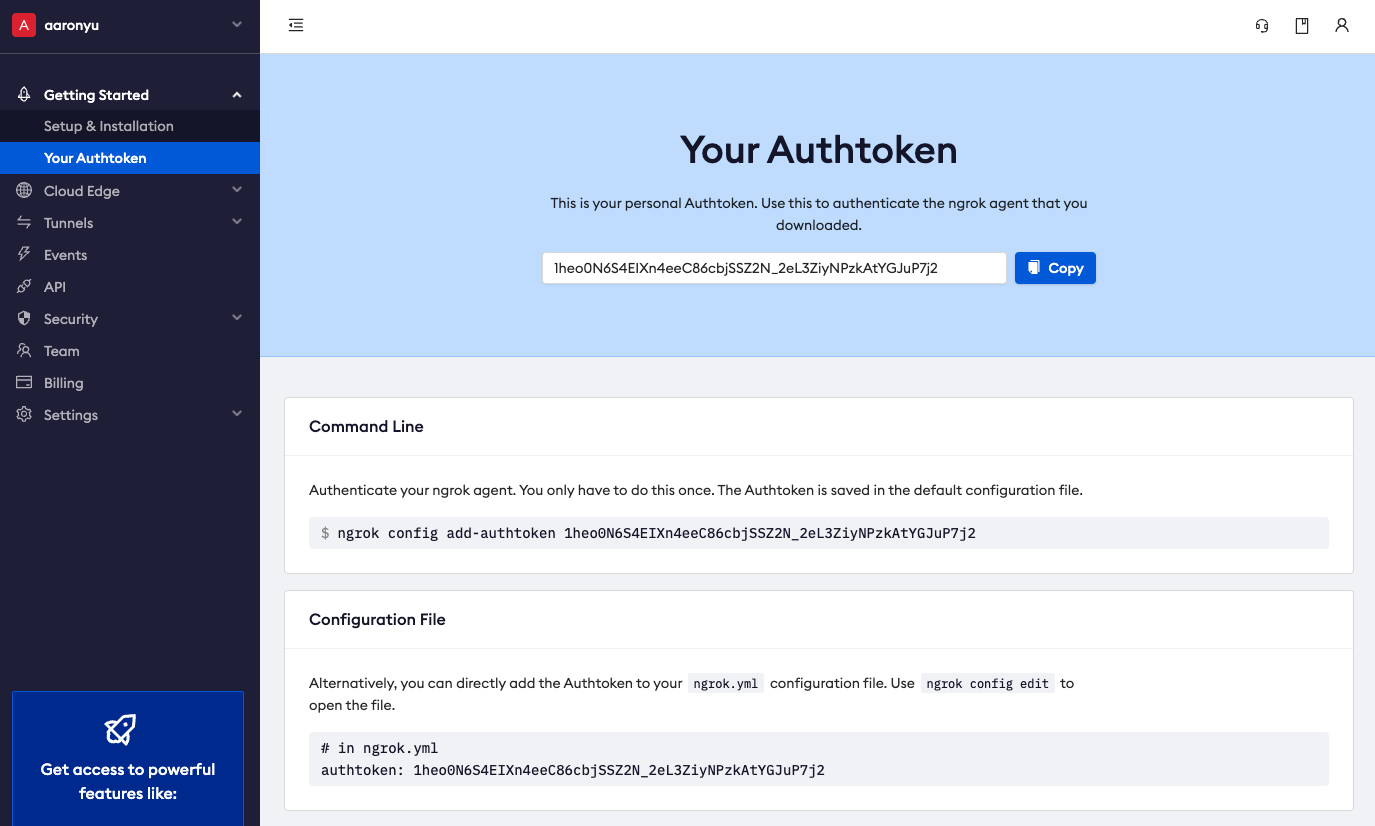